In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Dropout, Flatten, BatchNormalization
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the training datasets for DP and NDP
train_dp = pd.read_csv(r'G:\DataSet\train\trainDP.csv')
train_ndp = pd.read_csv(r'G:\DataSet\train\trainNDP.csv')

# Load the testing datasets for DP and NDP
test_dp = pd.read_csv(r'G:\DataSet\test\testDP.csv')
test_ndp = pd.read_csv(r'G:\DataSet\test\testNDP.csv')

# Combine DP and NDP datasets for training and testing
train_data = pd.concat([train_dp, train_ndp], ignore_index=True)
test_data = pd.concat([test_dp, test_ndp], ignore_index=True)

# Drop problematic columns
train_data = train_data.drop(columns=['FFT', 'Power spectral density'])
test_data = test_data.drop(columns=['FFT', 'Power spectral density'])

# Separate features and target variable for training data
X_train = train_data.drop(columns=['Class']).values
y_train = train_data['Class'].values

# Separate features and target variable for testing data
X_test = test_data.drop(columns=['Class']).values
y_test = test_data['Class'].values

# Encode target variable into numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define RCNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape input data to fit the 3D input shape required by Conv1D layer
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model with 50 epochs
model.fit(X_train, y_train_encoded, epochs=50, batch_size=64)

# Make predictions on the testing data
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Decode the predicted labels back to original string representations
y_pred_decoded = label_encoder.inverse_transform(y_pred.flatten())

# Generate classification report
report = classification_report(y_test, y_pred_decoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_decoded)

print("Accuracy:", accuracy)
print(report)


Epoch 1/50
12/12 [==============================] - 4s 11ms/step - loss: 0.5873 - accuracy: 0.6980
Epoch 2/50
12/12 [==============================] - 0s 12ms/step - loss: 0.4380 - accuracy: 0.8282
Epoch 3/50
12/12 [==============================] - 0s 13ms/step - loss: 0.3802 - accuracy: 0.8497
Epoch 4/50
12/12 [==============================] - 0s 14ms/step - loss: 0.3976 - accuracy: 0.8443
Epoch 5/50
12/12 [==============================] - 0s 17ms/step - loss: 0.4057 - accuracy: 0.8456
Epoch 6/50
12/12 [==============================] - 0s 17ms/step - loss: 0.3936 - accuracy: 0.8443
Epoch 7/50
12/12 [==============================] - 0s 14ms/step - loss: 0.3636 - accuracy: 0.8389
Epoch 8/50
12/12 [==============================] - 0s 19ms/step - loss: 0.3779 - accuracy: 0.8510
Epoch 9/50
12/12 [==============================] - 0s 17ms/step - loss: 0.3572 - accuracy: 0.8644
Epoch 10/50
12/12 [==============================] - 0s 15ms/step - loss: 0.3602 - accuracy: 0.8564
Epoch 11/

Epoch 1/50
12/12 [==============================] - 6s 16ms/step - loss: 0.5089 - accuracy: 0.7490
Epoch 2/50
12/12 [==============================] - 0s 16ms/step - loss: 0.4340 - accuracy: 0.8483
Epoch 3/50
12/12 [==============================] - 0s 17ms/step - loss: 0.3982 - accuracy: 0.8537
Epoch 4/50
12/12 [==============================] - 0s 16ms/step - loss: 0.3904 - accuracy: 0.8443
Epoch 5/50
12/12 [==============================] - 0s 17ms/step - loss: 0.4147 - accuracy: 0.8403
Epoch 6/50
12/12 [==============================] - 0s 16ms/step - loss: 0.3961 - accuracy: 0.8523
Epoch 7/50
12/12 [==============================] - 0s 16ms/step - loss: 0.3902 - accuracy: 0.8537
Epoch 8/50
12/12 [==============================] - 0s 17ms/step - loss: 0.3679 - accuracy: 0.8631
Epoch 9/50
12/12 [==============================] - 0s 16ms/step - loss: 0.3598 - accuracy: 0.8523
Epoch 10/50
12/12 [==============================] - 0s 16ms/step - loss: 0.3729 - accuracy: 0.8631
Epoch 11/

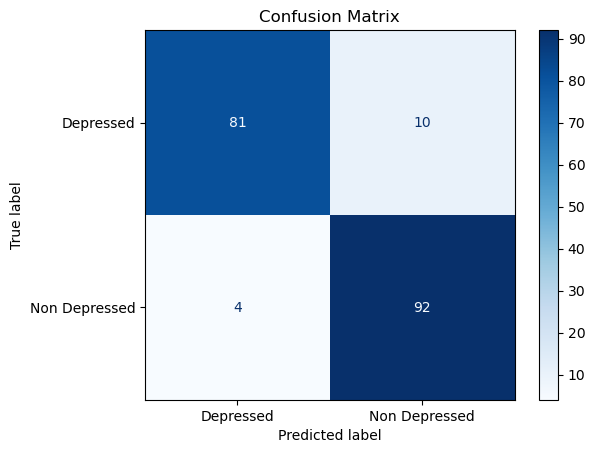

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Dropout, Flatten, BatchNormalization, Bidirectional
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the training datasets for DP and NDP
train_dp = pd.read_csv(r'G:\DataSet\train\trainDP.csv')
train_ndp = pd.read_csv(r'G:\DataSet\train\trainNDP.csv')

# Load the testing datasets for DP and NDP
test_dp = pd.read_csv(r'G:\DataSet\test\testDP.csv')
test_ndp = pd.read_csv(r'G:\DataSet\test\testNDP.csv')

# Combine DP and NDP datasets for training and testing
train_data = pd.concat([train_dp, train_ndp], ignore_index=True)
test_data = pd.concat([test_dp, test_ndp], ignore_index=True)

# Drop problematic columns
train_data = train_data.drop(columns=['FFT', 'Power spectral density'])
test_data = test_data.drop(columns=['FFT', 'Power spectral density'])

# Separate features and target variable for training data
X_train = train_data.drop(columns=['Class']).values
y_train = train_data['Class'].values

# Separate features and target variable for testing data
X_test = test_data.drop(columns=['Class']).values
y_test = test_data['Class'].values

# Encode target variable into numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # Transform test labels as well

# Define Bi-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape input data to fit the 3D input shape required by Conv1D layer
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model with 50 epochs
model.fit(X_train, y_train_encoded, epochs=50, batch_size=64)

# Make predictions on the testing data
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Generate confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


15/15 [==============================] - 1s 5ms/step


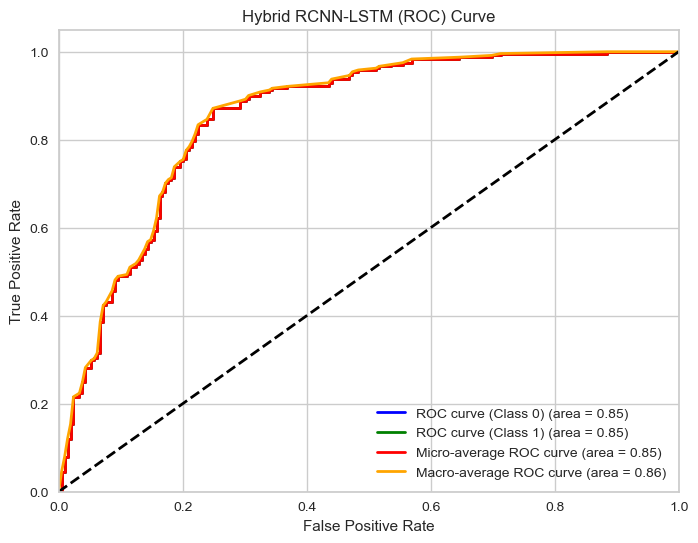

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten
import tensorflow as tf

# Generate synthetic data for demonstration with different parameters
X, y = make_classification(n_samples=1500, n_features=25, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define your hybrid RCNN-LSTM model using TensorFlow or any deep learning framework
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=10, verbose=0)

# Predict probabilities on the test set
y_pred_proba = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test.ravel(), y_pred_proba.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 2
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], color='blue', lw=2, label='ROC curve (Class 0) (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green', lw=2, label='ROC curve (Class 1) (area = %0.2f)' % roc_auc[1])
plt.plot(fpr_micro, tpr_micro, color='red', lw=2, label='Micro-average ROC curve (area = %0.2f)' % roc_auc_micro)
plt.plot(fpr_macro, tpr_macro, color='orange', lw=2, label='Macro-average ROC curve (area = %0.2f)' % roc_auc_macro)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Hybrid RCNN-LSTM (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Epoch 1/10
13/13 [==============================] - 13s 157ms/step - loss: 0.6887 - accuracy: 0.5325 - val_loss: 0.6574 - val_accuracy: 0.6700
Epoch 2/10
13/13 [==============================] - 0s 24ms/step - loss: 0.6525 - accuracy: 0.6463 - val_loss: 0.6072 - val_accuracy: 0.7350
Epoch 3/10
13/13 [==============================] - 0s 22ms/step - loss: 0.5921 - accuracy: 0.7212 - val_loss: 0.5613 - val_accuracy: 0.7100
Epoch 4/10
13/13 [==============================] - 0s 24ms/step - loss: 0.5390 - accuracy: 0.7337 - val_loss: 0.5454 - val_accuracy: 0.7250
Epoch 5/10
13/13 [==============================] - 0s 24ms/step - loss: 0.5101 - accuracy: 0.7663 - val_loss: 0.5404 - val_accuracy: 0.7450
Epoch 6/10
13/13 [==============================] - 0s 24ms/step - loss: 0.4766 - accuracy: 0.7725 - val_loss: 0.4720 - val_accuracy: 0.7800
Epoch 7/10
13/13 [==============================] - 0s 27ms/step - loss: 0.4687 - accuracy: 0.7900 - val_loss: 0.4514 - val_accuracy: 0.7650
Epoch 8/10


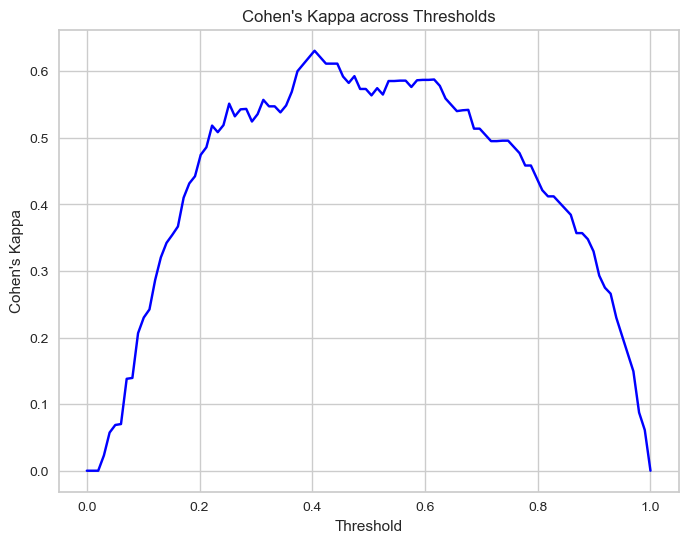

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Dropout, Flatten, Bidirectional
from keras.optimizers import Adam
from sklearn.datasets import make_classification

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for Conv1D input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define hybrid RCNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Varying thresholds
thresholds = np.linspace(0, 1, 100)
kappas = []

# Calculate Cohen's Kappa for each threshold
for threshold in thresholds:
    y_pred_probs = model.predict(X_test)
    y_pred_threshold = (y_pred_probs > threshold).astype(int)
    kappa = cohen_kappa_score(y_test, y_pred_threshold)
    kappas.append(kappa)

# Plot Cohen's Kappa across thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, kappas, color='blue')
plt.title("Cohen's Kappa across Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Cohen's Kappa")
plt.grid(True)
plt.show()
